# Exploratory analysis Värriö

Initial exploratory analysis of Värriö summer periods data. Analysis done without any transformations or feature engineering.

For Hyytiälä, Siikaneva and Kumpula make same steps with approriate source files and target variables. 

In [5]:
# imports
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from utils.transformations import add_time_components
from utils.analytical import calculate_vif, plot_histograms, plot_correlation_matrix, plot_extreme_days
from utils.df_utils import filter_by_month_interval
from file_config import FILE_PATHS

In [3]:
# configure file paths
sys.path.append("../src")  # Ensure src is in Python path if not already

## Load data

Loads data and picks summer months as defined.

In [7]:
# load data

var_summer_months = [7, 8] 


varrio_all = pd.read_csv(FILE_PATHS['var_combined'])


varrio_summer = filter_by_month_interval(varrio_all, 'Datetime', var_summer_months[0], var_summer_months[1])




Summarry of Värriö summer data

In [8]:
varrio_summer.describe()

,Datetime,VAR_META.TDRY0,VAR_META.SO2_1,VAR_EDDY.u_star,VAR_META.PAR,VAR_META.RH0,VAR_META.WS00,VAR_META.WDIR,VAR_META.rainint,2-2.3 nm
count,17856,17856.000000,17662.000000,16947.000000,17856.000000,17856.000000,17843.000000,17856.000000,17704.000000,17819.000000
mean,2022-01-30 11:45:00.000000256,12.764837,0.096064,0.553044,309.040539,75.477929,3.118689,171.010301,0.104261,5.381591
min,2019-07-01 00:00:00,1.665030,-0.137330,0.013070,-1.888000,19.294330,0.219400,14.320700,0.000000,0.004709
25%,2020-07-31 23:52:30,9.274722,-0.023330,0.374225,19.069500,61.884830,2.198000,96.770333,0.000000,0.644950
50%,2022-01-30 11:45:00,12.546810,-0.002670,0.543010,172.311000,77.752500,3.025500,176.724735,0.000000,1.257501
75%,2023-07-31 23:37:30,15.840623,0.029330,0.715660,503.680500,92.379330,3.909965,237.427503,0.000000,2.803926
max,2024-08-31 23:30:00,30.561840,13.466830,1.602120,1498.492000,99.691670,8.843600,358.200000,32.507200,1454.683012
std,NaN,4.883554,0.543237,0.241617,350.053606,18.886547,1.236865,77.965095,0.646759,29.196960


### Collinearities are investigate by plotting correlation matrix: 

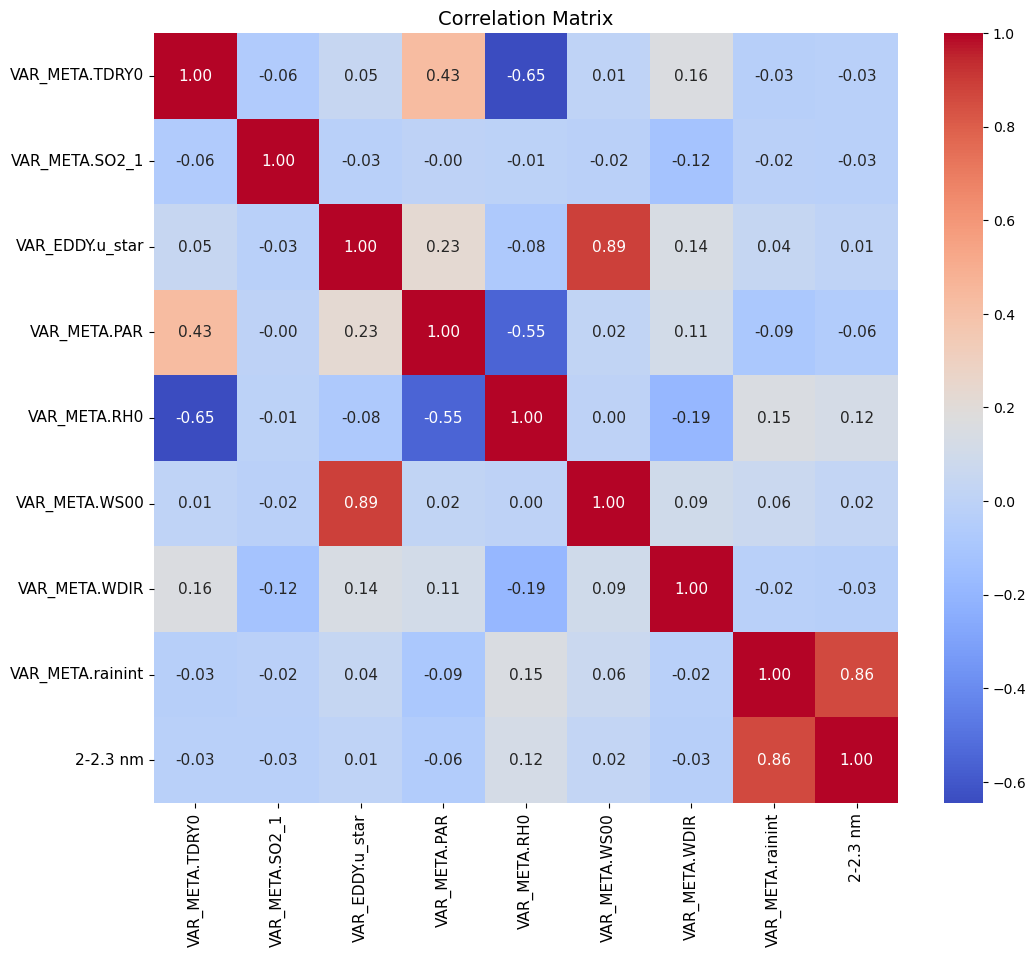

In [9]:
# plot correlation matrix
plot_correlation_matrix(varrio_summer)

### Variable inflation factors for features to investige multicollinearity:

In [10]:
# calculate variable inflation factors
varrio_vif = calculate_vif(varrio_summer, '2-2.3 nm')

varrio_vif

,Variable,VIF
0,VAR_META.TDRY0,7.647683
1,VAR_META.SO2_1,1.040352
2,VAR_EDDY.u_star,38.598669
3,VAR_META.PAR,2.925958
4,VAR_META.RH0,7.282308
5,VAR_META.WS00,43.604997
6,VAR_META.WDIR,5.745007
7,VAR_META.rainint,1.050303


### Distributions of all features and target variable are investigated by plotting histograms:

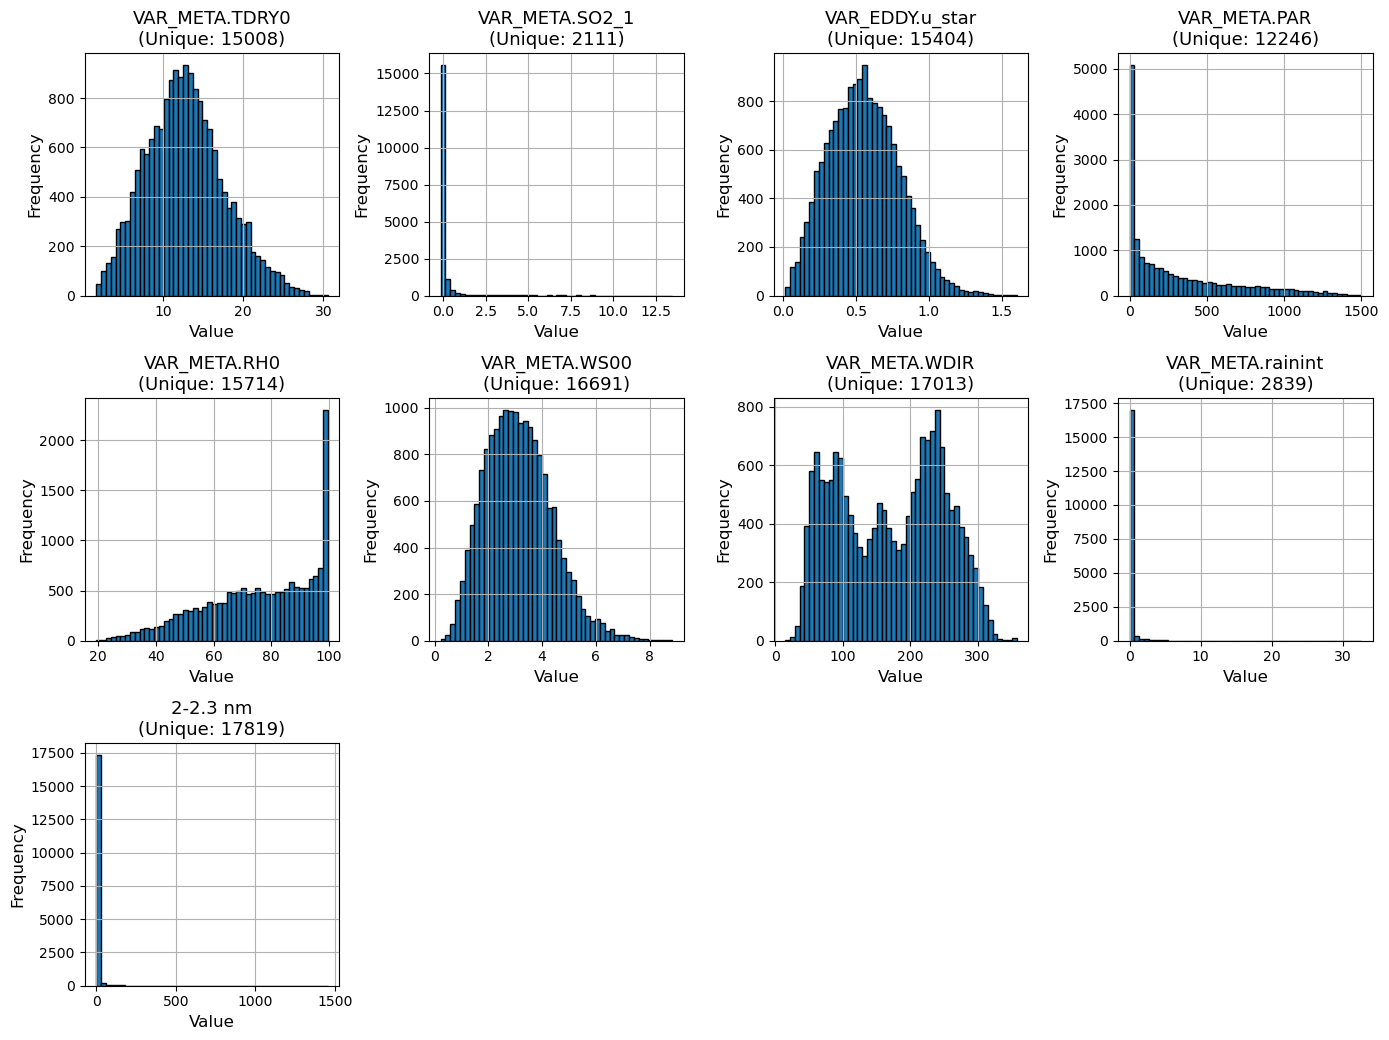

In [11]:


plot_histograms(varrio_summer)




Pairplots are used to investigate relationships between features and target variable. 

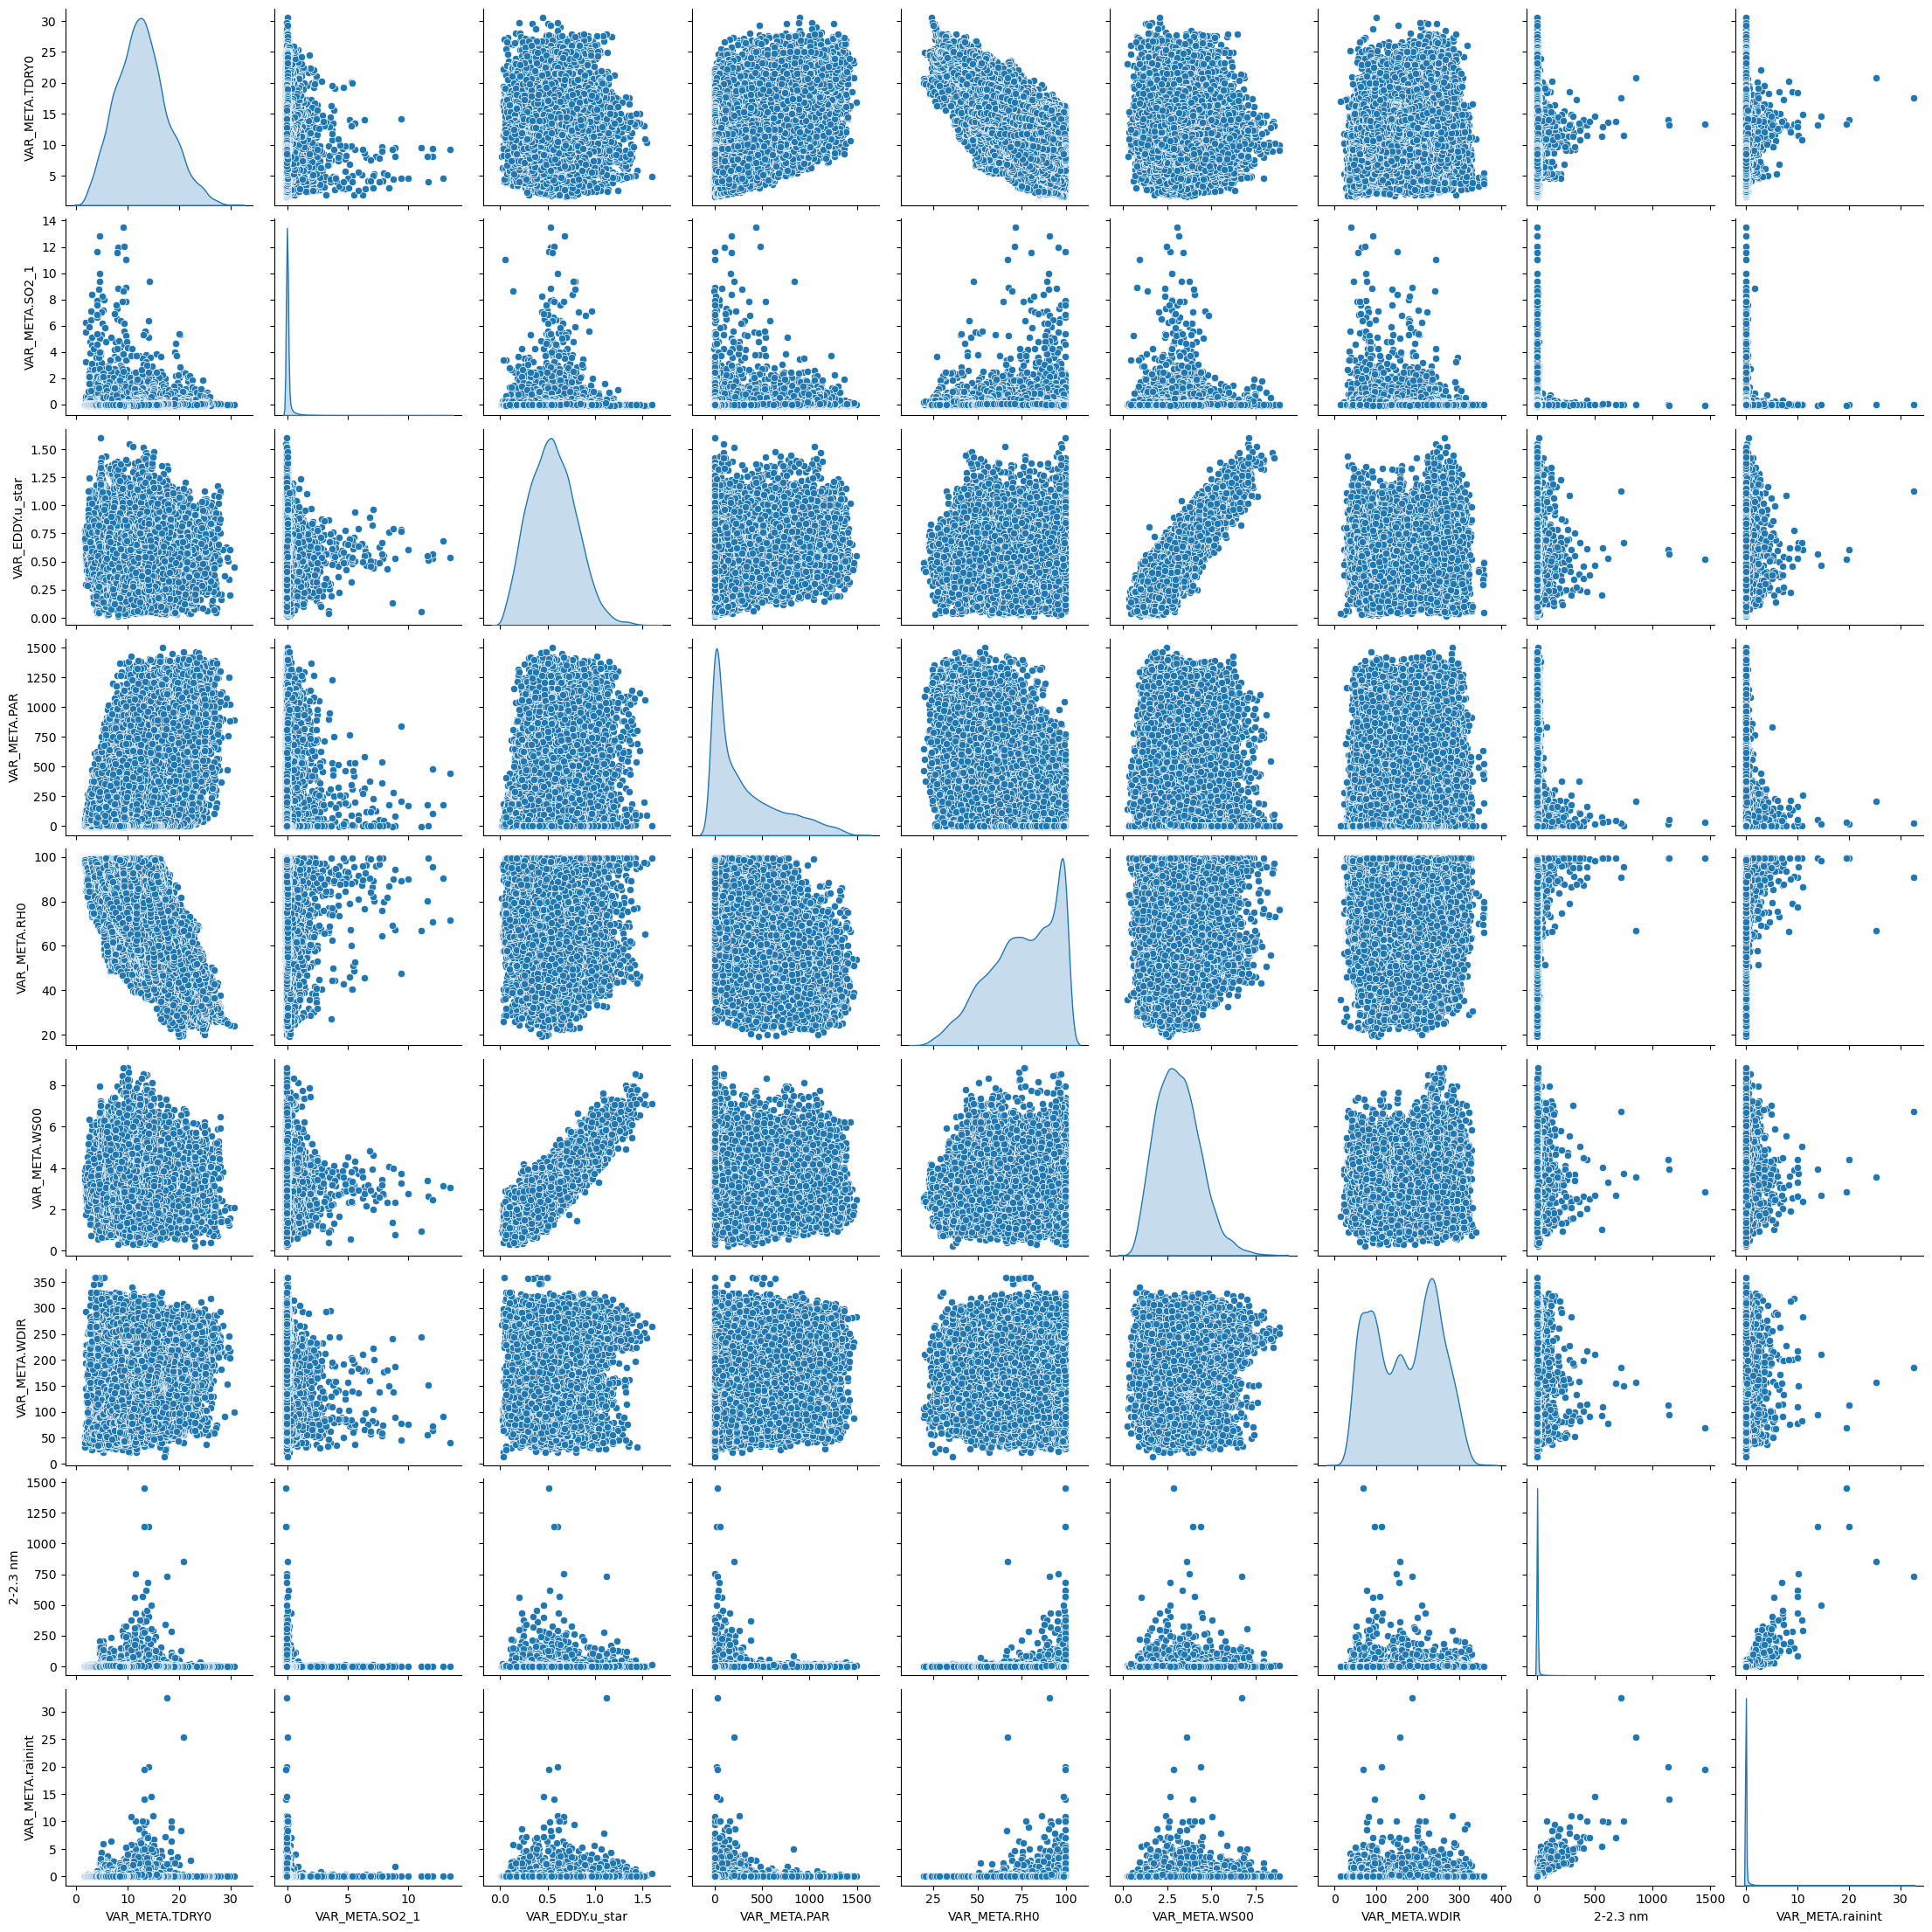

In [14]:


sns.pairplot(varrio_summer, diag_kind="kde")  # kde gives better density plots
plt.show()


As illustrative example all variables are plotted for three days with highest negative ion peak, as well as three days with lowest negative ions peak

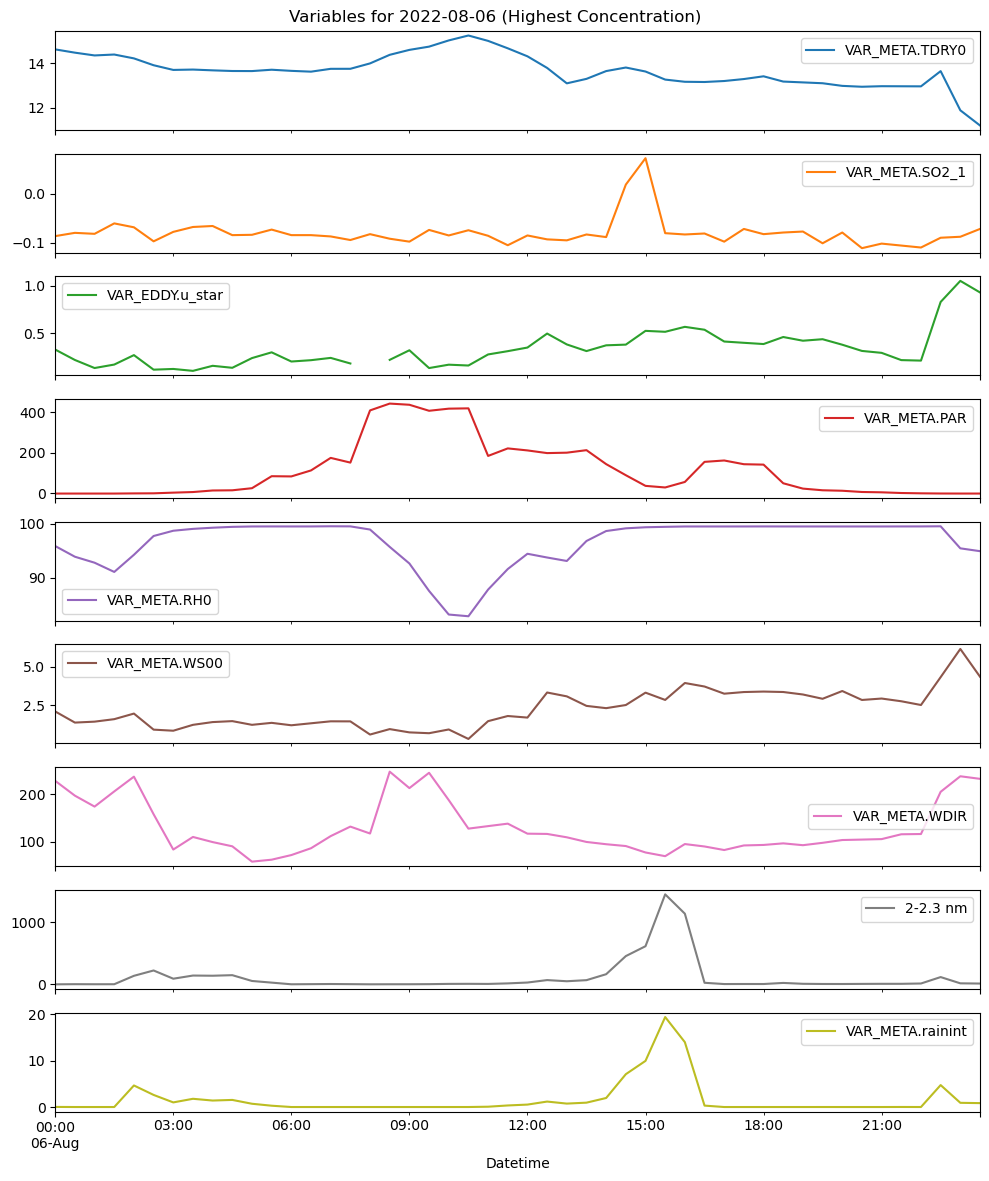

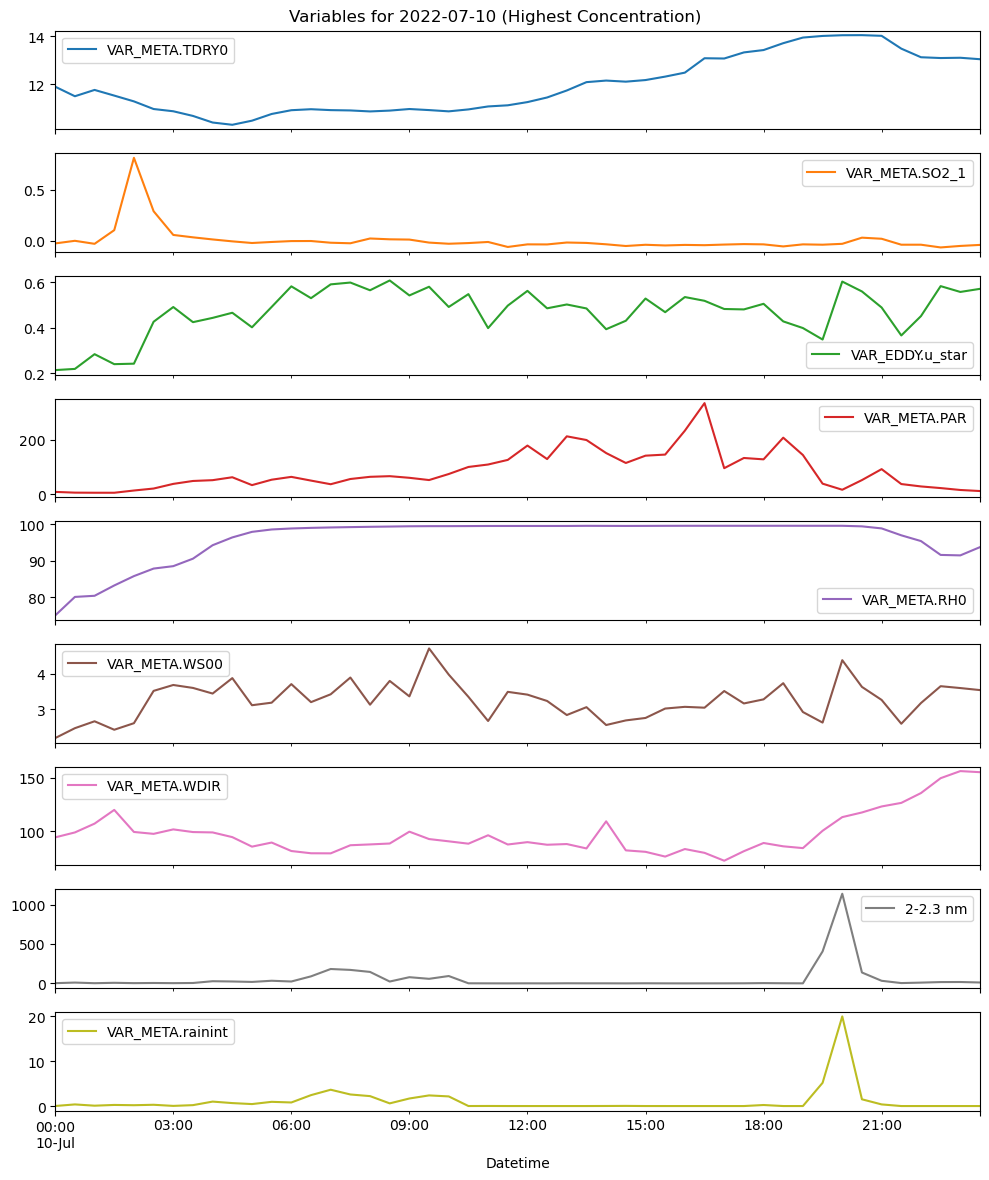

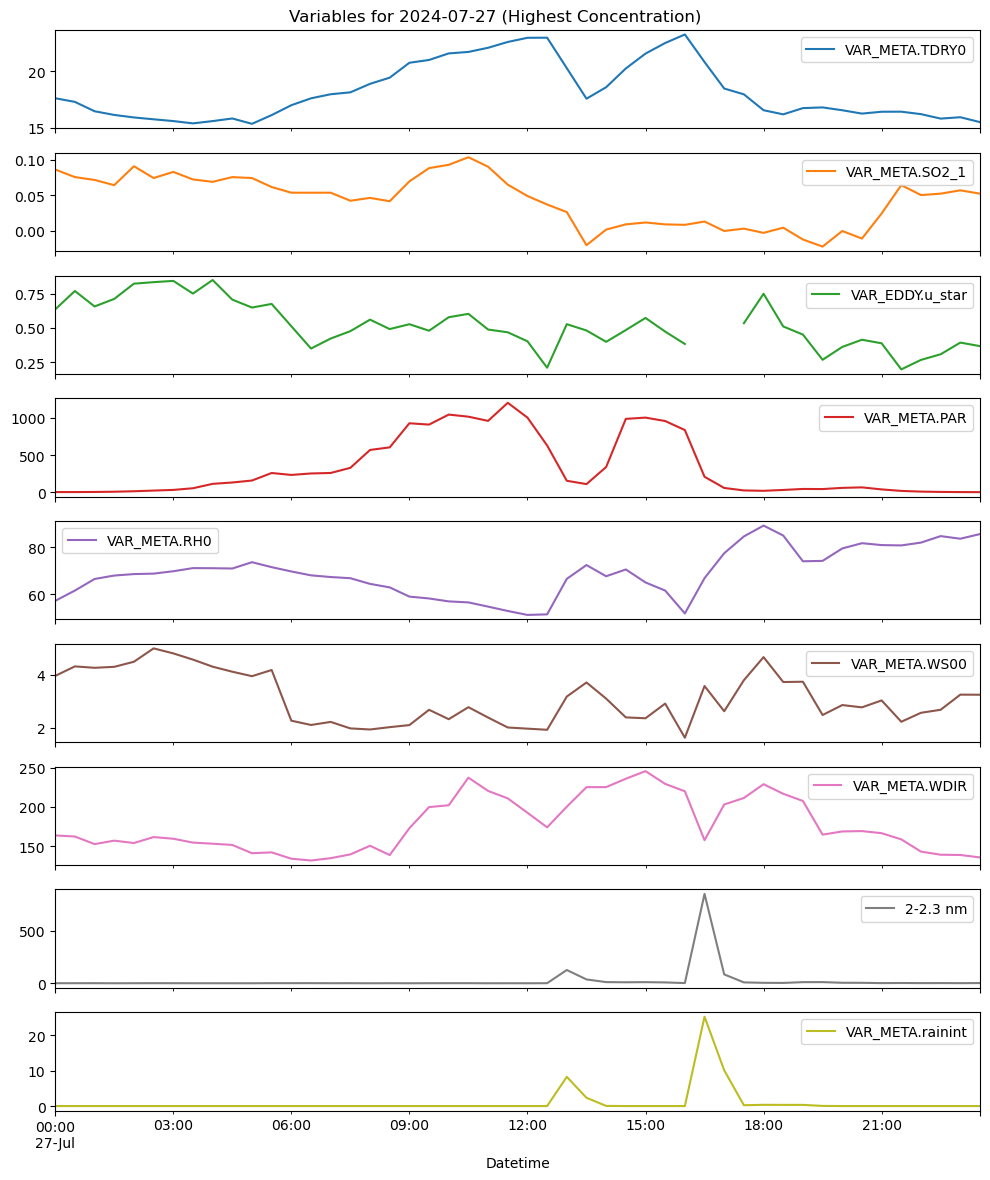

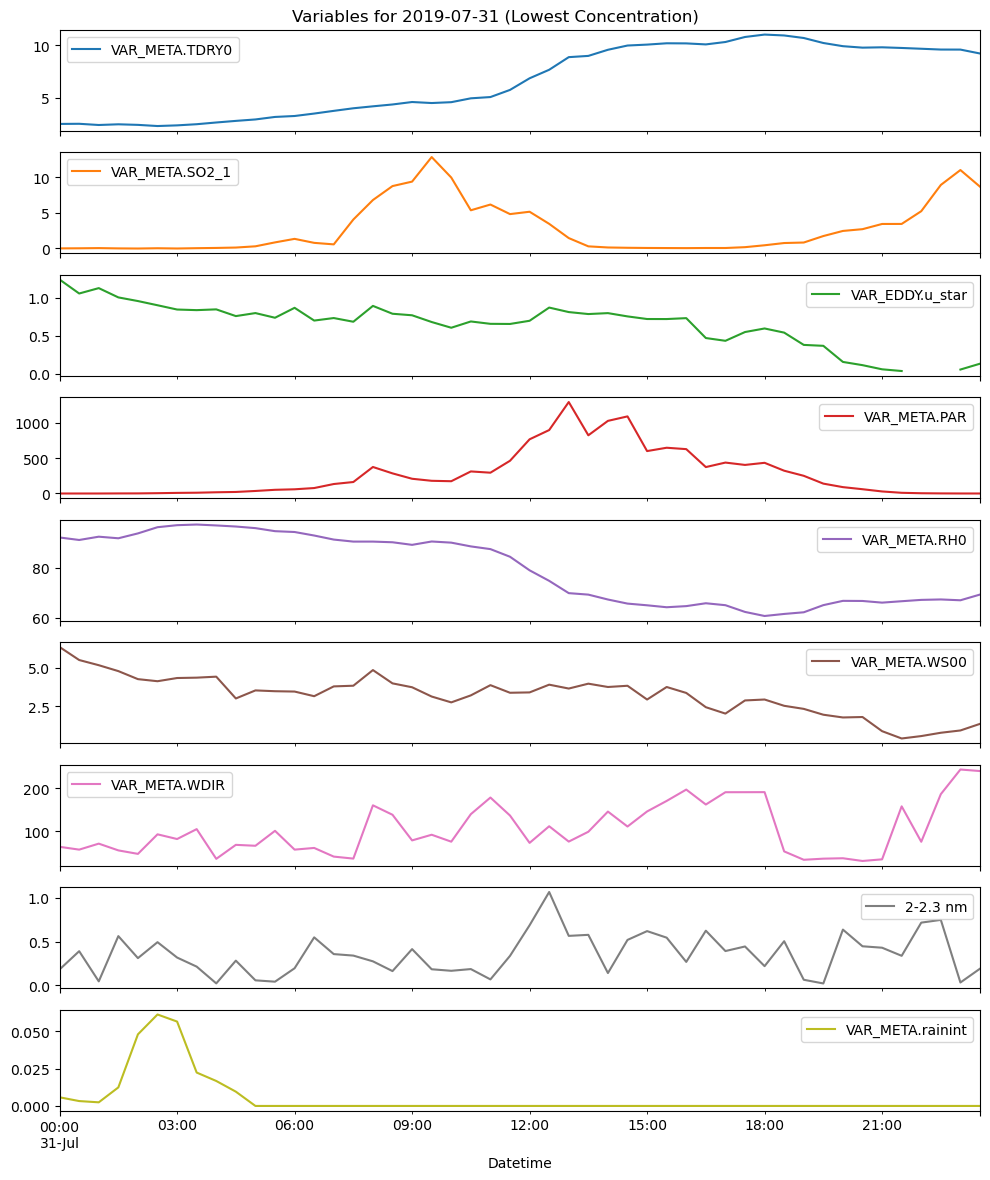

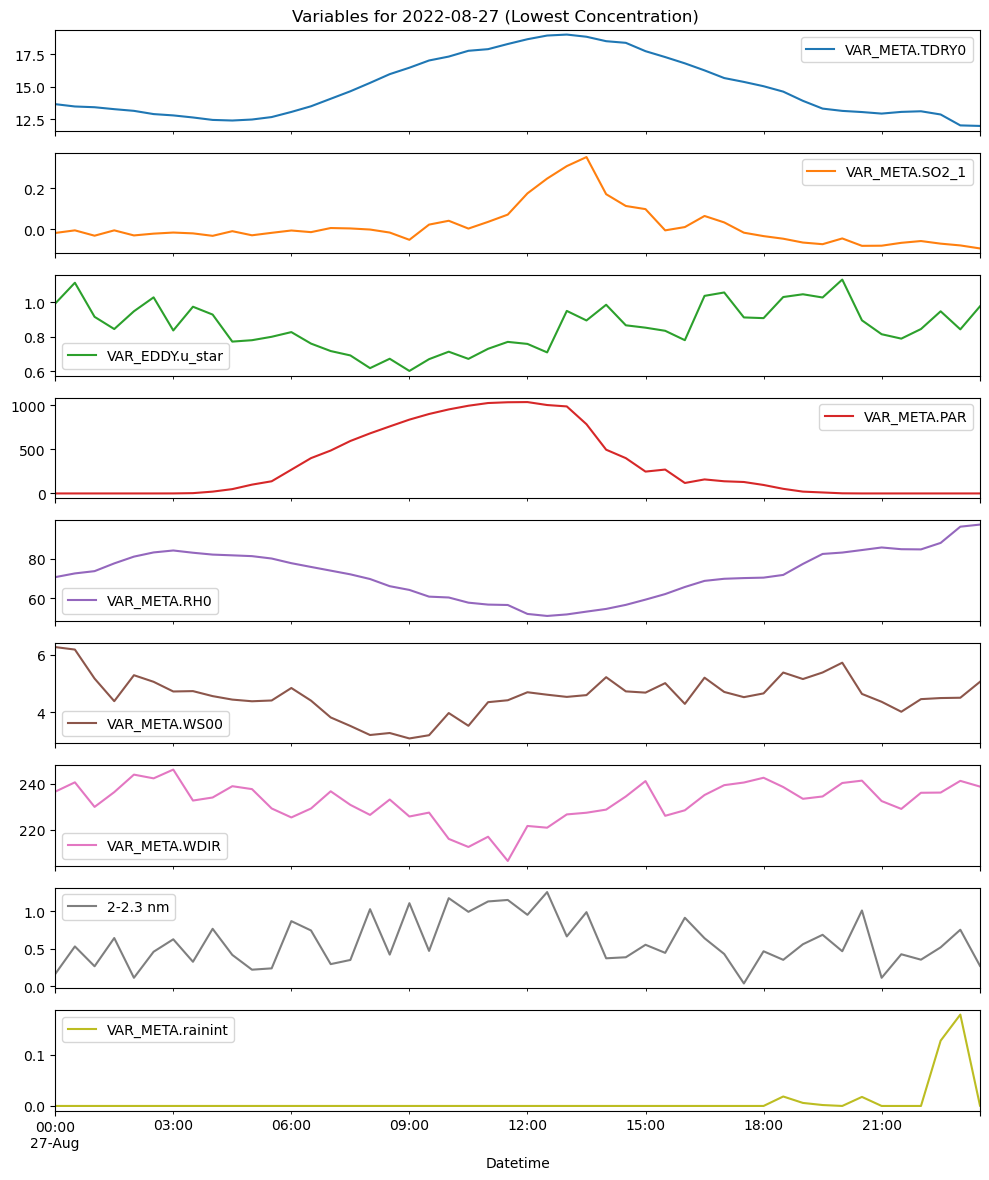

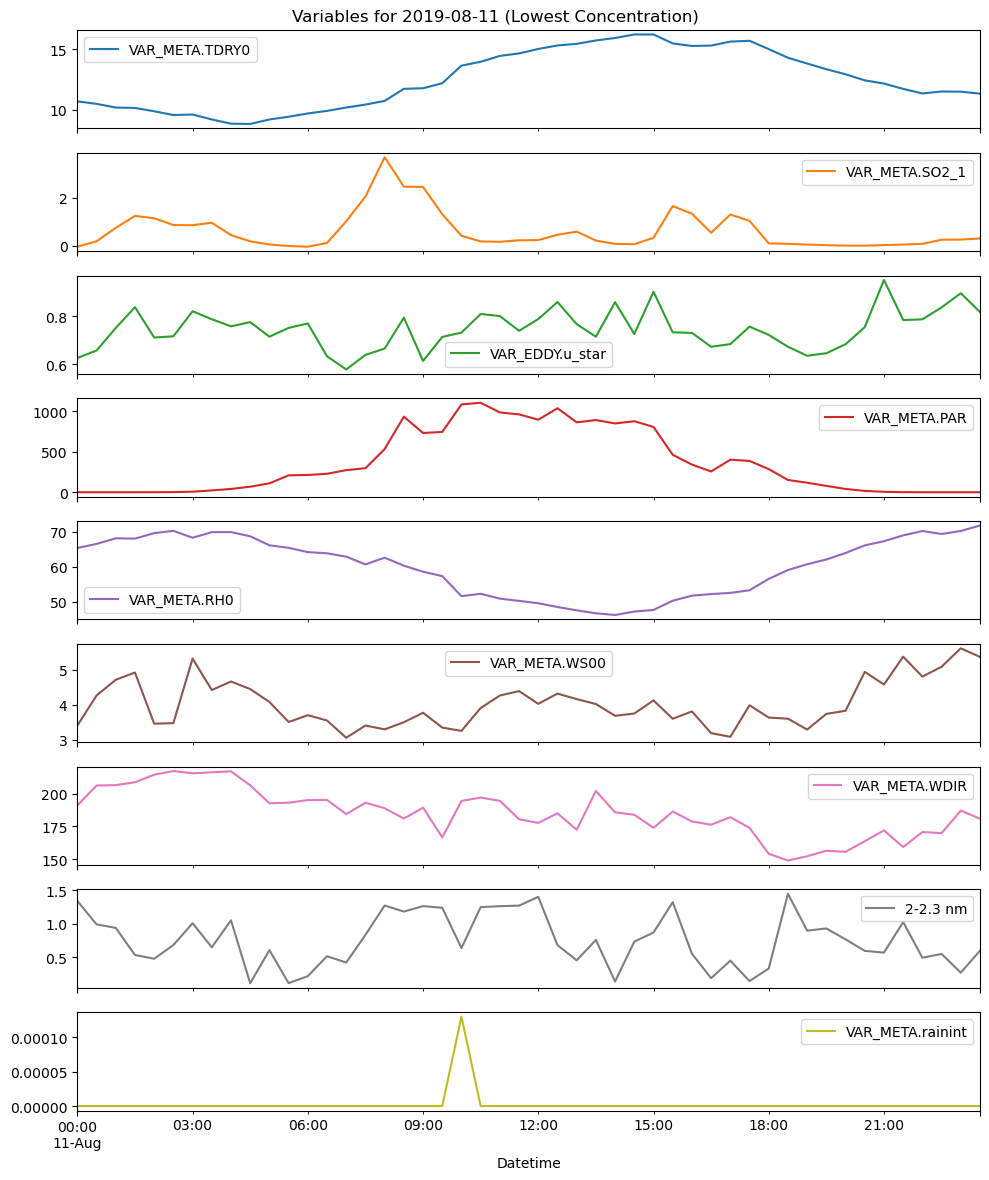

In [15]:
# plot extreme days

plot_extreme_days(varrio_summer, 'Datetime', '2-2.3 nm')